### The purpose of this notebook is to practice API Calls and Webscraping for the project. If the results of this practice are usable, **great**. If not, keep trying. It will become usable.


**Important Link** https://developers.themoviedb.org/3/discover/movie-discover

In [2]:
!pip install requests
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup

In [3]:
# Creating a list of 500 urls for the 500 pages of data I need
# For each number in the range of [1-501) add it where 'i' is in the url below
url_list = []
for i in range(1,501):
    url_list.append(str(f"http://api.themoviedb.org/3/discover/movie?api_key=41f8edb29d800a88a356853208f114f0&sort_by=popularity.desc&page={i}"))

      

    
    
    
    

In [4]:
# Creating a new list for store all of my urls
movies = []
for url in url_list:
    movies.append(requests.get(url))

# Creating a new list to store all of my response-object-JSON's from the GET requests
movies_json = []
for movie in movies:
    movies_json.append(movie.json())

# New list to store all of the 'results' for each movie
movies_results = []
for item in movies_json:
        # Using concatenation, not appending
    movies_results = movies_results + item['results']

In [5]:
# Confirming the code added 10,000 separate dictionaries to this list
# Not 500 separate lists (1 list per page)
len(movies_results)
# Success

10000

In [6]:
movies_df = pd.DataFrame.from_dict(movies_results)

In [7]:
# Sorting the list of 10k movies by popularity
# Permanently changing the data structure via 'inplace=True'
movies_df.sort_values(by='popularity', ascending=False, inplace=True)
movies_df.set_index('title', inplace=True)


In [52]:
movies_df.head(3)

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
title,,,,,,,,,,,,,
A Rainy Day in New York,1305.559,591,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",6.7,Two young people arrive in New York to spend a...,2019-07-26
Jumanji: The Next Level,272.710,1901,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
Ad Astra,271.489,2483,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",6.0,"The near future, a time when both hope and har...",2019-09-17


In [9]:
# Making a list of names for a sample SNS Barplot
# names = list(movies_df.index)[0:10]
# names

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set(style='darkgrid')

UsageError: Line magic function `%` not found.


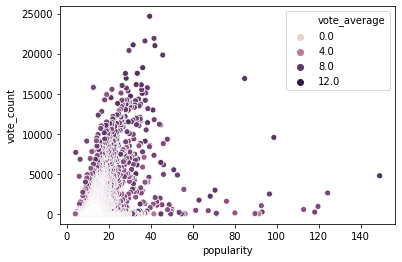

In [11]:
# Making a barchart of the top 10 most popular movies in my list
populs = movies_df[movies_df['popularity'] < 170]
votes = populs['vote_count']
pops = populs['popularity']
graph1 = sns.scatterplot(x = pops, y = votes, hue = populs['vote_average'], data = populs)
# graph1.set_yscale('log')



# plt.figure(figsize=(10,5))
# sns.barplot(names, movies_df['popularity'][0:10], palette='Set1')

# # Turning the tick labels on a 45
# pop_chart.set_xticklabels(
#     pop_chart.get_xticklabels(),
#     rotation = 45, horizontalalignment = 'right')


I think this graph is telling us that popularity is not correlated to the amount of votes it gets. In fact, it seems that those with high popularity might be exhibiting the high pop due to hype. Let's check out the release date of those with extremely high popularity.

I am interested in seeing the profit margin vs popularity. I am also interested in seeing which types of movies are doing best YOY.

### Does popularity equate to higher profit margins?

### Are there any genres experiencing higher profit margins?
### Are there any languages experiencing higher profit margins?
----------------
## Bonus:
   ### What is the profit velocity? (profit vs. time)
 

## There are a lot of cells commented out because they were used to make a CSV file of all of the links to be used in the project.

In [12]:
# movies_df[['popularity']].to_csv(r'/Users/davestearns/Documents/FlatIron/Mod1 Project/mod1_project-master\popularity_df.csv')

In [101]:
scrape_list = []
for i in range(1977,2021):
    scrape_list.append(f"https://www.boxofficemojo.com/year/world/{i}/")
scrape_list

['https://www.boxofficemojo.com/year/world/1977/',
 'https://www.boxofficemojo.com/year/world/1978/',
 'https://www.boxofficemojo.com/year/world/1979/',
 'https://www.boxofficemojo.com/year/world/1980/',
 'https://www.boxofficemojo.com/year/world/1981/',
 'https://www.boxofficemojo.com/year/world/1982/',
 'https://www.boxofficemojo.com/year/world/1983/',
 'https://www.boxofficemojo.com/year/world/1984/',
 'https://www.boxofficemojo.com/year/world/1985/',
 'https://www.boxofficemojo.com/year/world/1986/',
 'https://www.boxofficemojo.com/year/world/1987/',
 'https://www.boxofficemojo.com/year/world/1988/',
 'https://www.boxofficemojo.com/year/world/1989/',
 'https://www.boxofficemojo.com/year/world/1990/',
 'https://www.boxofficemojo.com/year/world/1991/',
 'https://www.boxofficemojo.com/year/world/1992/',
 'https://www.boxofficemojo.com/year/world/1993/',
 'https://www.boxofficemojo.com/year/world/1994/',
 'https://www.boxofficemojo.com/year/world/1995/',
 'https://www.boxofficemojo.com

In [102]:
soups = []
for url in scrape_list:
    soups.append(requests.get(url))

In [103]:
new = []
for soup in soups:
    new.append(BeautifulSoup(soup.content, 'html.parser'))

In [104]:
# This will get me the links on each page of each movie 
link_list = []   
for content in new:
    for record in content.findAll('tr'):
        for data in record.findAll('td'):
            for link in data.findAll('a', href=True):
                link_list.append(link['href'])
link_list

['/releasegroup/gr22499845/?ref_=bo_ydw_table_1',
 '/releasegroup/gr544363013/?ref_=bo_ydw_table_2',
 '/releasegroup/gr3946861061/?ref_=bo_ydw_table_3',
 '/releasegroup/gr1304711685/?ref_=bo_ydw_table_4',
 '/releasegroup/gr3980546565/?ref_=bo_ydw_table_5',
 '/releasegroup/gr4096283141/?ref_=bo_ydw_table_6',
 '/releasegroup/gr2182173189/?ref_=bo_ydw_table_7',
 '/releasegroup/gr1932218885/?ref_=bo_ydw_table_8',
 '/releasegroup/gr2367246853/?ref_=bo_ydw_table_9',
 '/releasegroup/gr4039791109/?ref_=bo_ydw_table_10',
 '/releasegroup/gr2990952965/?ref_=bo_ydw_table_11',
 '/releasegroup/gr861884933/?ref_=bo_ydw_table_12',
 '/releasegroup/gr1358385669/?ref_=bo_ydw_table_13',
 '/releasegroup/gr3573502469/?ref_=bo_ydw_table_14',
 '/releasegroup/gr4279652869/?ref_=bo_ydw_table_15',
 '/releasegroup/gr4224143877/?ref_=bo_ydw_table_16',
 '/releasegroup/gr3274920453/?ref_=bo_ydw_table_17',
 '/releasegroup/gr3289141765/?ref_=bo_ydw_table_18',
 '/releasegroup/gr974803461/?ref_=bo_ydw_table_19',
 '/rele

In [106]:
url2 = 'https://www.boxofficemojo.com/'
new_links = []
for link in link_list:
    new_links.append(url2 + link)



In [107]:
# from tqdm import tqdm


In [110]:
new3 = []
for link in new_links:
    html_page_movie = requests.get(link) # Make a get request to retrieve the page
    soup = BeautifulSoup(html_page_movie.content, 'html.parser')
    for item in soup.findAll('div', id="title-summary-refiner"):
        for page in item.findAll('a', href=True):
            new3.append(page['href'])
            print(page['href'])

    

/title/tt0076759/?ref_=bo_gr_ti
/title/tt0075860/?ref_=bo_gr_ti
/title/tt0076666/?ref_=bo_gr_ti
/title/tt0076729/?ref_=bo_gr_ti
/title/tt0075784/?ref_=bo_gr_ti
/title/tt0075925/?ref_=bo_gr_ti
/title/tt0076752/?ref_=bo_gr_ti
/title/tt0076489/?ref_=bo_gr_ti
/title/tt0075686/?ref_=bo_gr_ti
/title/tt0078227/?ref_=bo_gr_ti
/title/tt0076538/?ref_=bo_gr_ti
/title/tt0076138/?ref_=bo_gr_ti
/title/tt0076141/?ref_=bo_gr_ti
/title/tt0076009/?ref_=bo_gr_ti
/title/tt0076618/?ref_=bo_gr_ti


KeyboardInterrupt: 

In [24]:
# Importing the big list of links made from web scraping
big_links = pd.read_csv('big_links.csv')
# Reducing the DF to include just the links as a column
# Originally had a column named 'Unnamed: 0' was a second index column - unnecessary
big_links = big_links[['0']]

In [115]:
big_links.rename(columns = {'0':'links'}, inplace=True)
imdb_id = []
for i in big_links['links']:
    imdb_id.append(i[37:46])
len(imdb_id)

17275

In [91]:
# Creating a BeautifulSoup object from each link in the final_links list
# Finding all of the 'span' class 'money' objects
# Appending only the 5th element found
# It seemed to be that = the budget number
# soups = []
# for link in big_links['links']:
#     page = requests.get(link)
#     soups.append(BeautifulSoup(page.content, 'html.parser'))
# budgets = []
# for soup in soups:
#     result = soup.find('span', class_='money')
#     budgets.append(result)
#     print(result)
# gross_value = soup.find('span', text='Gross:').find_next('span').text

In [112]:
url = 'https://www.boxofficemojo.com//title/tt0075860/?ref_=bo_gr_ti'
url[37:46]

'tt0075860'

In [90]:
# soups = []
# for link in big_links['links']:
#     page = requests.get(link)
#     soups.append(BeautifulSoup(page.content, 'html.parser'))
# budgets = []
# for soup in soups:
#     result = soup.findAll('span', class_='money')
#     try:
#         budgets.append(result[4])
#     except IndexError:
#         print(link)